## 1. Winter is Coming: Loading the dataset

<p><em>Game of Thrones</em> is the hugely popular TV series by HBO based on the book series <em>A Song of Ice and Fire</em> by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the  <em>Game of Thrones</em> books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books. </p>

<p>This dataset constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge. It was put together and made available by Andrew Beveridge <a href="https://github.com/mathbeveridge/asoiaf">here</a>. Let's load in the data for the first book <em>A Game of Thrones</em> and inspect it.</p>

In [1]:
# Import pandas
import pandas as pd

# Read in datasets/book1.csv
book1 = pd.read_csv("datasets/book1.csv")

# Print out the head of the dataset to inspect
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## 2. Network of Thrones
<p>We see the DataFrame <code>book1</code> has 5 columns: <code>Source</code>, <code>Target</code>, <code>Type</code>, <code>weight</code>, and <code>book</code>. Source and target are the two nodes that are linked by an (undirected) edge. The weight attribute of each edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.</p>
<p>To create a network, we use <code>networkx</code> to create a graph object for the first book.</p>

In [2]:
# Import networkx
import networkx as nx

# Create an empty graph object
G_book1 = nx.Graph()

## 3. Populate the network with the DataFrame
<p>We now populate <code>G_book1</code> with the edges from <code>book1</code>, as well as load in the rest of the books.</p>

In [3]:
# Iterate through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

# Create a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 4. Finding the most "important" character in Game of Thrones: Degree Centrality
<p>(I mean, we all know it's Tyrion.) There are a lot of different ways to measure the importance of a node in a network. Let's first measure the importance of a node in a network by looking at degree centrality (the number of neighbors a node has).</p>
<p>Using degree centrality, we'll list the top ten important characters from the first book and the fifth book.</p>

In [4]:
# Degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sort the dictionaries according to their degree centrality and store the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[:10]

# Sort the dictionaries according to their degree centrality and store the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[:10]

# Print out the top 10 of book1 and book5
print(sorted_deg_cen_book1)
print(sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## 5. Evolution of importance of characters over the books
<p>According to degree centrality, the most important character in the first book is Eddard Stark. However, he is not in the top 10 of the fifth book. With something like <em>Game of Thrones</em>, the importance of characters can change over time.</p>
<p>Let's look at how degree centrality changes for characters like Eddard Stark, Jon Snow, and Tyrion, all of whom are important characters in the first book.</p>

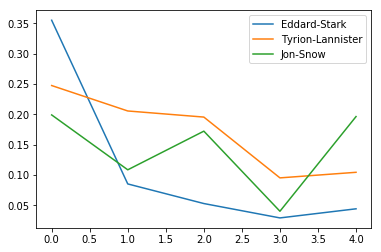

In [5]:
%matplotlib inline

# Create a list of degree centrality of all the books using a list comprehension
evol = [nx.degree_centrality(book) for book in books]

# Create a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Plot the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## 6. Using other metrics of importance: Betweenness Centrality
<p>We see that the importance of Eddard Stark <em>dies off</em> as the book series progresses. With Jon Snow, there is a drop in the fourth book but a sudden rise in the fifth book.</p>
<p>Now let's use other metrics like betweenness centrality (which measures the number of shortest paths that pass through a vertex) and PageRank (the one Google first used) to find important characters in our character co-occurrence network. We'll first plot the evolution of betweenness centrality over the five books, focusing on the top 4 characters of each book.</p>

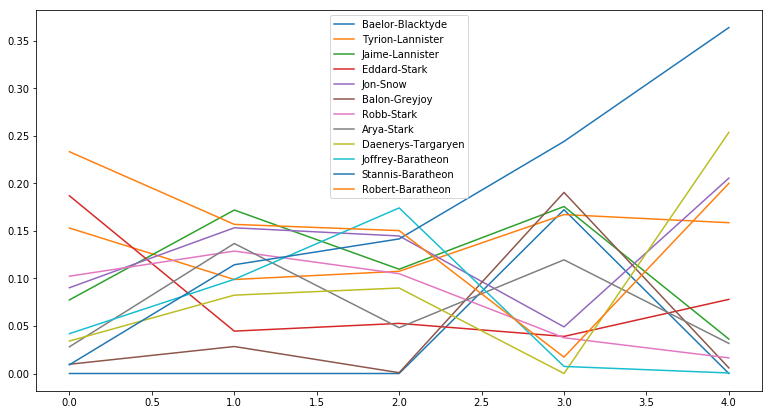

In [6]:
# Create a list of betweenness centrality of all the books just like we did for degree centrality (weights matter here!)
evol = [nx.betweenness_centrality(book, weight='weight') for book in books]

# Make a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Find the top 4 characters in every book. 
# We'll use the set function to make sure we don't have duplicates (and order doesn't matter). |= is bitwise OR.
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.iloc[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plot the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13,7))

## 7.  Using other metrics of importance: Google PageRank
<p>We see a rise in the importance of Stannis Baratheon over the books. In the fifth book, he is significantly more important than other characters in the network, even though he is the third most important character according to degree centrality.</p>
<p>PageRank evaluates the inlinks and outlinks of directed networks. Let's look at the importance of characters in the Game of Thrones network according to PageRank. </p>

['Jon-Snow', 'Daenerys-Targaryen', 'Stannis-Baratheon']


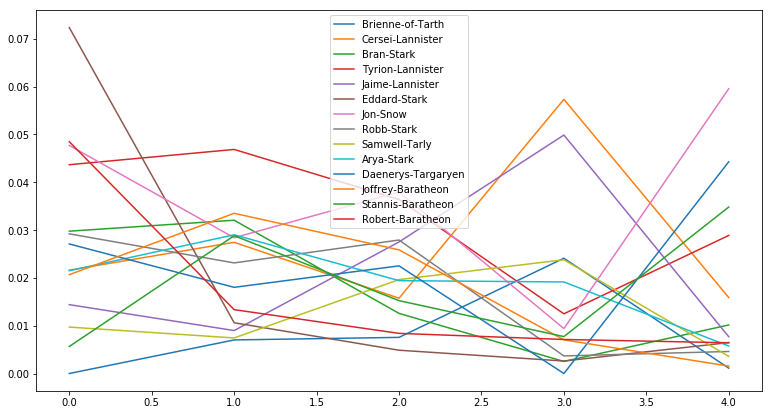

In [7]:
# Create a list of pagerank of all the books
evol = [nx.pagerank(book) for book in books]

# Make a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol).fillna(0)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.iloc[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plot the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13,7))

# Print the top 3 characters of the fifth book to verify what's shown in the plot
pagerank_evol_dfsub=pagerank_evol_df.loc[[4],list_of_char]
print(list(pagerank_evol_dfsub.iloc[0].sort_values(ascending=False)[0:3].index))

## 8. Correlation between different measures
<p>Jon Snow, Daenerys, and Stannis are the most important characters in the fifth book according to PageRank. Eddard Stark's trajectory is similar as seen earlier with degree centrality and betweenness centrality: he is important in the first book but disappears over the course of the book series.</p>
<p>All three metrics of node importance tell us something about the characters and their importance in the co-occurrence network. We see some names pop up in all three metrics, so perhaps there is a strong correlation between them.</p>
<p>Let's look at the correlation between PageRank, betweenness centrality, and degree centrality for the fifth book using Pearson correlation.</p>

In [8]:
# Create a list of pagerank, betweenness centrality, and degree centrality of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## 9. Conclusion
<p>We see a high correlation between these three measures for our character co-occurrence network.</p>
<p>So we've been looking at different ways to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these three measures? </p>

In [9]:
# Finding the most important character in the fifth book, according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent, d_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank, b_cent, d_cent)

Jon-Snow Stannis-Baratheon Jon-Snow


Well it looks like Jon Snow knows some things after all.